In [1]:
# standard imports 
import numpy as np
import pandas as pd
from scipy import stats

# plotting imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [4]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 8.7 KB


In [7]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
pd.crosstab(tips_df.sex, tips_df.smoker)

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


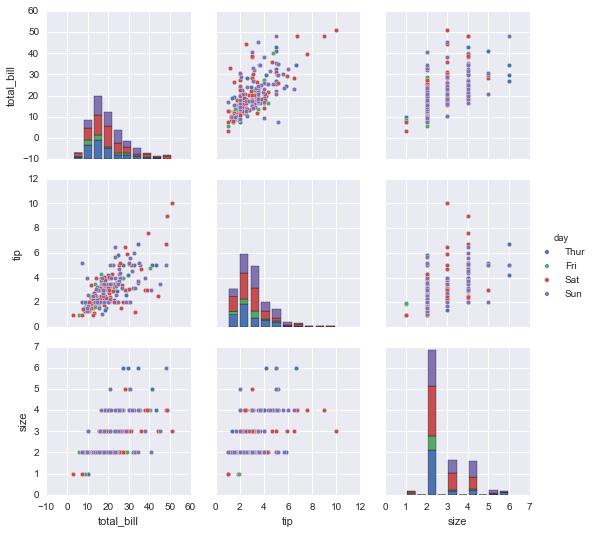

In [12]:
sns.pairplot(tips_df, hue='day')

In [17]:
tips_df.groupby(by='sex').mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [18]:
tips_df.groupby(by='sex').std()

,total_bill,tip,size
sex,,,
Male,9.246469,1.489102,0.955997
Female,8.009209,1.159495,0.937644


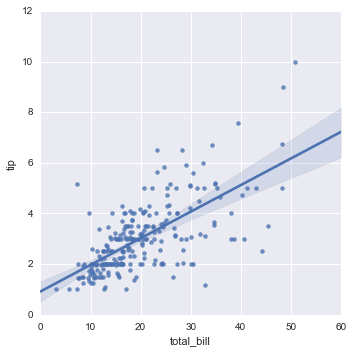

In [21]:
sns.lmplot('total_bill', 'tip', tips_df)

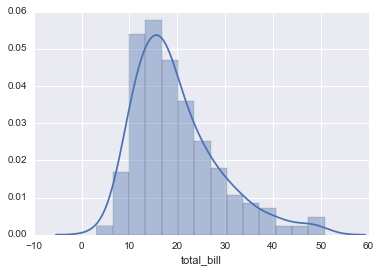

In [24]:
sns.distplot(tips_df['total_bill'])

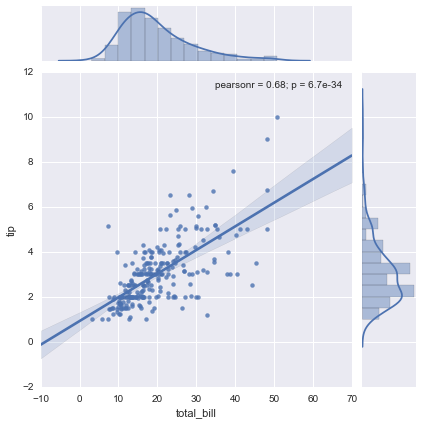

In [28]:
sns.jointplot('total_bill', 'tip', data=tips_df, kind='reg')

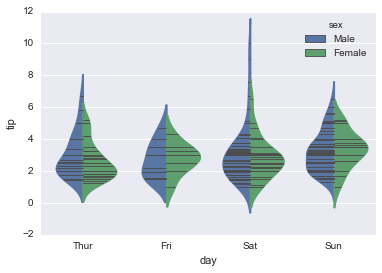

In [46]:
sns.violinplot(x='day', y='tip', data=tips_df, hue='sex', inner='sticks', split=True)

In [32]:
tips_df[tips_df['tip'] < 0]

,total_bill,tip,sex,smoker,day,time,size


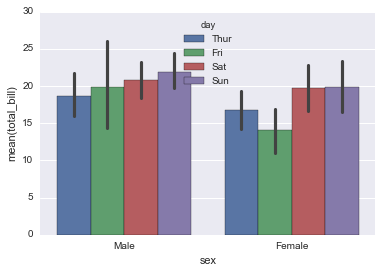

In [49]:
sns.barplot(x='sex', y='total_bill', data=tips_df, hue='day')

In [52]:
tips_df['total_bill_per_person'] = tips_df['total_bill'] / tips_df['size']
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,6.147500


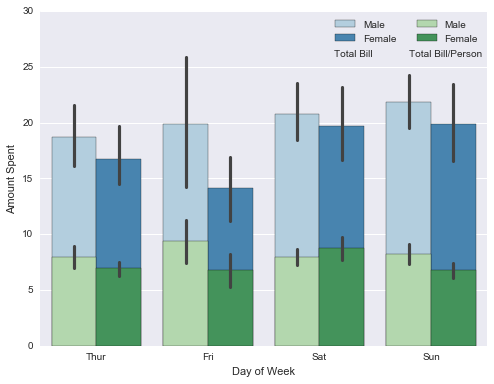

In [106]:
f, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='Blues')
sns.barplot(x='day', y='total_bill_per_person', data=tips_df, hue='sex', palette='Greens')

ax.legend(ncol=2, loc='upper right')
plt.ylabel('Amount Spent')
plt.xlabel('Day of Week')

plt.annotate('Total Bill', xy=(2.13, 25.9))
plt.annotate('Total Bill/Person', xy=(2.8, 25.9))

C:\Users\SZahn\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


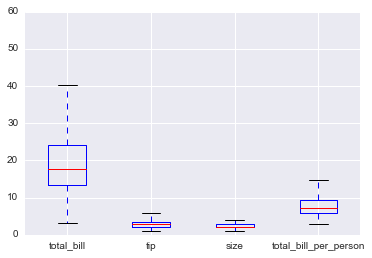

In [80]:
_ = tips_df.boxplot()